In [146]:
import pandas as pd
covid_data_df = pd.read_csv('data/covid_data.csv')
country_data = covid_data_df

In [147]:
country_data

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
0,Afghanistan,2019-12-31,0,0,38928341.0,2.581,1803.987,0.5
1,Afghanistan,2020-01-01,0,0,38928341.0,2.581,1803.987,0.5
2,Afghanistan,2020-01-02,0,0,38928341.0,2.581,1803.987,0.5
3,Afghanistan,2020-01-03,0,0,38928341.0,2.581,1803.987,0.5
4,Afghanistan,2020-01-04,0,0,38928341.0,2.581,1803.987,0.5
...,...,...,...,...,...,...,...,...
23077,International,2020-02-28,0,0,NaN,NaN,NaN,NaN
23078,International,2020-02-29,0,2,NaN,NaN,NaN,NaN
23079,International,2020-03-01,0,0,NaN,NaN,NaN,NaN
23080,International,2020-03-02,0,0,NaN,NaN,NaN,NaN


In [148]:

# Filter data for countries with at least 5 hospital beds per 1000 inhabitants
filtered_data = country_data[country_data['hospital_beds_per_thousand'] >= 5]

# Calculate the probability of having GDP over $10,000 in the filtered data
probability_gdp_over_10000_given_beds = (filtered_data['gdp_per_capita'] > 10000).mean()

print(f"The probability that a country has GDP over $10,000 given they have at least 5 hospital beds per 1000 inhabitants is: {probability_gdp_over_10000_given_beds:.4f}")

The probability that a country has GDP over $10,000 given they have at least 5 hospital beds per 1000 inhabitants is: 0.8565


In [143]:
covid_data_df_location = covid_data_df.groupby(by='location').agg({'new_deaths':'sum'}).reset_index()
df = covid_data_df[['location', 'population']].drop_duplicates()

In [144]:
df = covid_data_df_location.merge(df, on='location', how='left')

In [145]:
# Calculate death rate (deaths per million inhabitants)
df['Death_Rate'] = (df['new_deaths'] / df['population']) * 1e6

# Find the country with the 3rd highest death rate
third_highest_death_rate_country = df.nlargest(3, 'Death_Rate').iloc[-1]['location']

print(f"The country with the 3rd highest death rate is: {third_highest_death_rate_country}")

The country with the 3rd highest death rate is: Andorra


In [142]:
df

,location,new_deaths,population,Death_Rate
0,Afghanistan,384,38928341.0,9.864279
1,Afghanistan,384,38928341.0,9.864279
2,Afghanistan,384,38928341.0,9.864279
3,Afghanistan,384,38928341.0,9.864279
4,Afghanistan,384,38928341.0,9.864279
...,...,...,...,...
23077,Zimbabwe,4,14862927.0,0.269126
23078,Zimbabwe,4,14862927.0,0.269126
23079,Zimbabwe,4,14862927.0,0.269126
23080,Zimbabwe,4,14862927.0,0.269126


In [109]:

import pandas as pd

# Assuming you have a DataFrame named 'covid_data' with columns 'Date', 'Italy_Confirmed', and 'Germany_Confirmed'
# covid_data = pd.read_csv("your_covid_dataset.csv")
covid_data_1 = pd.DataFrame()

# Calculate the difference in confirmed cases between Italy and Germany
covid_data_1['Cases_Difference'] = covid_data[covid_data_df['location']=='Italy']['new_cases'] - covid_data[covid_data_df['location']=='Germany']['new_cases']

# Find the date when the difference became more than 10,000
date_threshold_exceeded = covid_data.loc[covid_data['Cases_Difference'] > 10000, 'date'].min()

print(f"The difference in total confirmed cases between Italy and Germany became more than 10,000 on {date_threshold_exceeded}.")


The difference in total confirmed cases between Italy and Germany became more than 10,000 on nan.


In [94]:
german_df = covid_data_df[covid_data_df['location']=='Germany']
italy_df = covid_data_df[covid_data_df['location']=='Italy']

In [99]:
italy_df

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
10688,Italy,2019-12-31,0,0,60461828.0,23.021,35220.084,3.18
10689,Italy,2020-01-01,0,0,60461828.0,23.021,35220.084,3.18
10690,Italy,2020-01-02,0,0,60461828.0,23.021,35220.084,3.18
10691,Italy,2020-01-03,0,0,60461828.0,23.021,35220.084,3.18
10692,Italy,2020-01-04,0,0,60461828.0,23.021,35220.084,3.18
...,...,...,...,...,...,...,...,...
10846,Italy,2020-06-06,518,85,60461828.0,23.021,35220.084,3.18
10847,Italy,2020-06-07,270,72,60461828.0,23.021,35220.084,3.18
10848,Italy,2020-06-08,197,53,60461828.0,23.021,35220.084,3.18
10849,Italy,2020-06-09,280,65,60461828.0,23.021,35220.084,3.18


In [98]:
print(italy_df.shape, german_df.shape)

(163, 8) (163, 8)


In [15]:
cardio_alco_df = pd.read_csv('data/cardio_alco.csv')
cardio_base_df = pd.read_csv('data/cardio_base.csv')
covid_data_df = pd.read_csv('data/covid_data.csv')

In [17]:
print(cardio_alco_df.columns, cardio_base_df.columns, covid_data_df.columns)

Index(['id', 'alco'], dtype='object') Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'smoke'],
      dtype='object') Index(['location', 'date', 'new_cases', 'new_deaths', 'population',
       'aged_65_older_percent', 'gdp_per_capita',
       'hospital_beds_per_thousand'],
      dtype='object')


In [20]:
cardio_df = cardio_base_df.merge(cardio_alco_df, on='id', how='left')

In [85]:
import numpy as np
alchocol_df = cardio_df[cardio_df['alco'].isna()==False]
cardio_df[(cardio_df['alco'].isna()==False) & (cardio_df['age']<=50)] 

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,alco
32,40.013699,1,159,60.0,110,70,1,0,0.0
37,49.249315,1,164,70.0,130,90,1,0,0.0
39,49.660274,1,165,70.0,140,90,1,0,0.0
45,47.865753,1,162,64.0,140,90,1,0,0.0
46,49.882192,1,162,107.0,150,90,2,0,0.0
...,...,...,...,...,...,...,...,...,...
69954,41.509589,1,170,60.0,120,80,2,0,0.0
69957,42.564384,2,166,90.0,120,80,1,1,0.0
69958,41.750685,2,169,67.0,160,90,1,0,0.0
69961,45.473973,1,161,50.0,110,75,1,0,0.0


In [87]:
alchocol_df['alco'].value_counts()

0.0    53862
1.0     3041
Name: alco, dtype: int64

In [84]:
cardio_df[cardio_df['alco'].isna()==False]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,alco
32,40.013699,1,159,60.0,110,70,1,0,0.0
33,56.580822,1,160,73.0,130,85,1,0,0.0
34,60.109589,2,173,82.0,140,90,3,0,0.0
35,55.901370,1,163,55.0,120,80,1,0,0.0
36,50.213699,2,175,95.0,120,80,1,0,0.0
...,...,...,...,...,...,...,...,...,...
69962,57.947945,1,178,69.0,130,90,1,0,0.0
69963,53.528767,2,155,76.0,130,90,1,0,0.0
69964,61.619178,2,170,72.0,120,80,1,0,0.0
69965,42.328767,2,165,66.0,120,80,1,0,0.0


In [59]:

import pandas as pd

# Sample height_data DataFrame, replace this with your actual DataFrame
height_data = cardio_df

# Calculate the height value at the 99th percentile
height_99th_percentile = height_data['height'].quantile(0.99)

print(f"The height of the tallest 1% of people is {height_99th_percentile:.2f} units.")


The height of the tallest 1% of people is 184.00 units.


In [63]:
cardio_df = cardio_df[['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'smoke', 'alco']]

In [64]:
import pandas as pd

# Sample data DataFrame, replace this with your actual DataFrame
# data = pd.read_csv("your_dataset.csv")

# Calculate Spearman rank correlation matrix
spearman_corr_matrix = cardio_df.corr(method='spearman')

# Find the pair of features with the highest absolute Spearman rank correlation
max_corr_pair = spearman_corr_matrix.abs().unstack().sort_values(ascending=False).drop_duplicates().idxmax()

feature1, feature2 = max_corr_pair

print(f"The two features with the highest Spearman rank correlation are: {feature1} and {feature2}")

The two features with the highest Spearman rank correlation are: age and age


In [70]:
# ! pip install seaborn

<Axes: >

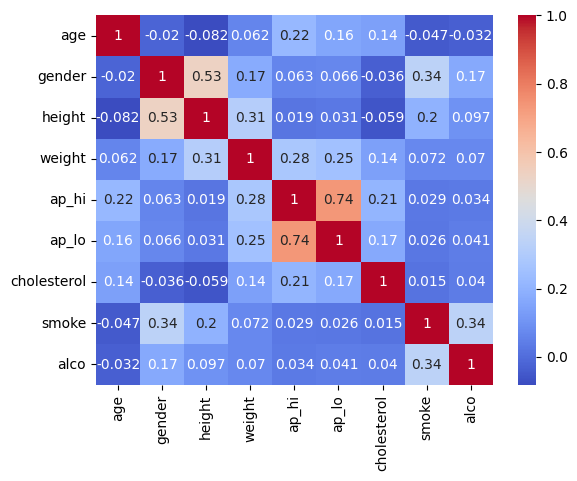

In [71]:
# spearman_corr_matrix
import seaborn as sns
sns.heatmap(spearman_corr_matrix, annot=True, cmap='coolwarm')

In [72]:
import pandas as pd

# Sample height_data DataFrame, replace this with your actual DataFrame
height_data = cardio_df
# Calculate the average height and standard deviation
average_height = height_data['height'].mean()
std_deviation = height_data['height'].std()

# Calculate the threshold for being more than 2 standard deviations away
threshold = average_height + 2 * std_deviation

# Calculate the percentage of people above the threshold
percentage_above_threshold = (height_data['height'] > threshold).mean() * 100

print(f"The percentage of people more than 2 standard deviations away from the average height is {percentage_above_threshold:.2f}%.")


The percentage of people more than 2 standard deviations away from the average height is 2.06%.


In [36]:
cardio_df['age'] = cardio_df['age']/365

In [40]:
cardio_df[cardio_df['age']>=50]['cholesterol'].mean() / cardio_df['cholesterol'].mean()

1.0398741965547564

In [27]:
import pandas as pd

# Sample health_data DataFrame, replace this with your actual DataFrame
health_data = pd.read_csv('data/cardio_base.csv')

# Create age groups and calculate average weight for each group
age_groups = health_data.groupby('age')['weight'].mean()

# Find the age group with the highest average weight
max_weight_age_group = age_groups.idxmax()

# Find the age group with the lowest average weight
min_weight_age_group = age_groups.idxmin()

# Calculate the difference in average weight
weight_difference = age_groups[max_weight_age_group] - age_groups[min_weight_age_group]

print(f"The age group with the highest average weight ({max_weight_age_group} years) is "
      f"{weight_difference:.2f} units heavier than the age group with the lowest weight ({min_weight_age_group} years).")

The age group with the highest average weight (15086 years) is 154.00 units heavier than the age group with the lowest weight (21582 years).


In [34]:

# Calculate the percentage difference
percentage_difference = (weight_difference / age_groups[min_weight_age_group]) * 100

print(f"The age group with the highest average weight ({max_weight_age_group} years) is "
      f"{percentage_difference:.2f}% heavier than the age group with the lowest weight ({min_weight_age_group} years).")

The age group with the highest average weight (15086 years) is 1400.00% heavier than the age group with the lowest weight (21582 years).


In [32]:
eval("21582/15086")

1.4305979053427018

In [55]:

import pandas as pd

# Sample health_data DataFrame, replace this with your actual DataFrame
health_data = pd.read_csv('data/cardio_base.csv')
health_data['gender'].replace({2:'Female',1:'Male'},inplace=True)

health_data['smoke'].replace({0:'Non Smoker',1:'Smoker'},inplace=True)
# Create a contingency table (cross-tabulation) of gender and smoking status
contingency_table = pd.crosstab(health_data['gender'], health_data['smoke'])

# Calculate the proportions of smokers for each gender
proportion_smokers_male = contingency_table['Smoker']['Male'] / contingency_table['Male'].sum()
proportion_smokers_female = contingency_table['Smoker']['Female'] / contingency_table['Female'].sum()

# Compare the proportions
if proportion_smokers_male > proportion_smokers_female:
    print("Men are more likely to be smokers than women.")
elif proportion_smokers_male < proportion_smokers_female:
    print("Women are more likely to be smokers than men.")
else:
    print("The likelihood of being a smoker is the same for men and women.")

KeyError: 'Male'

In [57]:
contingency_table

smoke,Non Smoker,Smoker
gender,,
Female,19114,5356
Male,44717,813
